**Downloading needed libraries**

In [1]:
!pip install pycaret[full]  > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
nbclient 0.6.6 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
en-core-web-sm 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 2.3.7 which is incompatible.
datascience 0.1

In [3]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pycaret.regression import *
from pycaret.utils import version
version()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


'2.3.10'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/content/MEV_Selected_top_countries.csv', sep=";")

In [54]:
df.head(2)

,Date,Korea_Nominal_GDP,Korea_CPI,Korea_Unemployment_rate,Korea_Residential_property_index,US_Nominal_GDP,US_CPI,US_Unemployment_rate,US_Residential_property_index,Canada_Nominal_GDP,...,Switzerland_Residential_property_index,UK_Nominal_GDP,UK_CPI,UK_Unemployment_rate,UK_Residential_property_index,D_Nominal_GDP,D_CPI,D_Unemployment_rate,D_Residential_property_index,Unnamed: 25
0,1975-01-01,2370600,9.012579,NaN,63.2476,1616.116,52.566667,8.27,60.02,167572,...,36.2205,26777,14.043801,3.969991,5.4978,NaN,39.142725,3.6,128.1556,NaN
1,1975-04-01,2583900,9.738219,NaN,65.3178,1651.853,53.200000,8.87,60.96,173748,...,35.7642,28090,15.371077,4.339689,5.6187,NaN,39.903834,4.2,127.2398,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    188 non-null    object 
 1   Korea_Nominal_GDP                       188 non-null    int64  
 2   Korea_CPI                               188 non-null    float64
 3   Korea_Unemployment_rate                 128 non-null    float64
 4   Korea_Residential_property_index        188 non-null    float64
 5   US_Nominal_GDP                          188 non-null    float64
 6   US_CPI                                  188 non-null    float64
 7   US_Unemployment_rate                    188 non-null    float64
 8   US_Residential_property_index           188 non-null    float64
 9   Canada_Nominal_GDP                      188 non-null    int64  
 10  Canada_CPI                              188 non-null    float6

In [56]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    188 non-null    datetime64[ns]
 1   Korea_Nominal_GDP                       188 non-null    int64         
 2   Korea_CPI                               188 non-null    float64       
 3   Korea_Unemployment_rate                 128 non-null    float64       
 4   Korea_Residential_property_index        188 non-null    float64       
 5   US_Nominal_GDP                          188 non-null    float64       
 6   US_CPI                                  188 non-null    float64       
 7   US_Unemployment_rate                    188 non-null    float64       
 8   US_Residential_property_index           188 non-null    float64       
 9   Canada_Nominal_GDP                      188 non-null  

In [58]:
df = df.iloc[:,:-1]

**Taking some rows for testing**

In [59]:
test_size = 10

mev = df[:test_size]

In [60]:
mev.shape, df.shape

((10, 25), (188, 25))

In [61]:
col_list = df.drop(columns=['Date','US_Nominal_GDP']).columns.to_list()

In [71]:
model = setup(data = df,  
            target = 'US_Nominal_GDP',
            session_id=13, 
            log_experiment=True,
           # date_features=['Date'],
            train_size=0.8,
            normalize=True,
            normalize_method = 'minmax',
            numeric_imputation='mean',
            data_split_shuffle=False,
            numeric_features=col_list)

,Description,Value
0,session_id,13
1,Target,US_Nominal_GDP
2,Original Data,"(188, 25)"
3,Missing Values,True
4,Numeric Features,23
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(150, 31)"


In [72]:
top = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,1.274254e+02,2.803504e+04,1.441467e+02,8.984000e-01,0.0191,0.0171,0.043
llar,Lasso Least Angle Regression,1.343944e+02,2.934502e+04,1.522066e+02,8.591000e-01,0.0246,0.0223,0.019
omp,Orthogonal Matching Pursuit,1.472603e+02,4.196870e+04,1.773362e+02,7.954000e-01,0.0290,0.0243,0.016
br,Bayesian Ridge,1.208331e+02,3.045142e+04,1.480623e+02,7.858000e-01,0.0277,0.0212,0.017
lr,Linear Regression,1.160761e+02,2.914570e+04,1.483333e+02,7.659000e-01,0.0309,0.0222,0.030
huber,Huber Regressor,2.717254e+02,1.550648e+05,3.054534e+02,-1.673000e-01,0.0661,0.0591,0.051
gbr,Gradient Boosting Regressor,4.222656e+02,3.251899e+05,4.838921e+02,-9.704000e-01,0.0840,0.0806,0.089
rf,Random Forest Regressor,4.506496e+02,3.441323e+05,5.111751e+02,-1.074600e+00,0.0873,0.0841,0.472
xgboost,Extreme Gradient Boosting,4.983257e+02,3.738775e+05,5.720393e+02,-1.089500e+00,0.0978,0.0903,0.414
et,Extra Trees Regressor,3.231092e+02,2.480471e+05,3.643234e+02,-1.157000e+00,0.0693,0.0724,0.415


In [73]:
models

<function pycaret.regression.models(type: Union[str, NoneType] = None, internal: bool = False, raise_errors: bool = True) -> pandas.core.frame.DataFrame>

In [74]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21.3568,720.6639,26.8452,0.9867,0.0134,0.0109
1,91.5537,9805.4160,99.0223,0.8817,0.0327,0.0308
2,72.1700,6536.0947,80.8461,0.9534,0.0196,0.0177
3,104.1860,12739.4219,112.8690,0.9191,0.0211,0.0200
4,64.9908,5709.3208,75.5601,0.9462,0.0118,0.0102
5,124.2904,21438.2090,146.4179,0.8929,0.0185,0.0159
6,278.4555,93226.3203,305.3299,0.7465,0.0317,0.0286
7,117.6294,16979.9512,130.3071,0.9563,0.0114,0.0104
8,170.2729,32424.5586,180.0682,0.9325,0.0129,0.0122


In [75]:
tuned_lasso = tune_model(lasso, choose_better=True,n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,59.1223,4702.8706,68.5775,0.9134,0.0397,0.0322
1,51.0745,3804.5789,61.6813,0.9541,0.0201,0.0171
2,69.8023,5851.7715,76.4969,0.9583,0.0189,0.0173
3,104.4521,12952.2988,113.8082,0.9178,0.0213,0.0200
4,60.9315,5719.0674,75.6245,0.9461,0.0116,0.0094
5,117.3332,20060.1836,141.6340,0.8998,0.0180,0.0150
6,120.4490,24845.1367,157.6234,0.9324,0.0157,0.0120
7,70.9286,6299.1460,79.3672,0.9838,0.0071,0.0063
8,84.8361,9653.4941,98.2522,0.9799,0.0071,0.0061


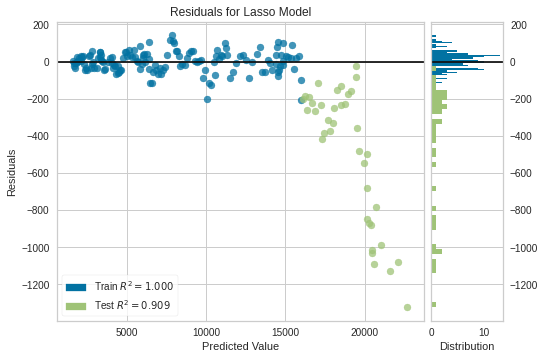

In [76]:
plot_model(tuned_lasso)

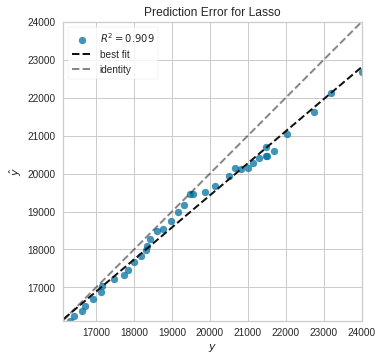

In [77]:
plot_model(tuned_lasso, plot = 'error')

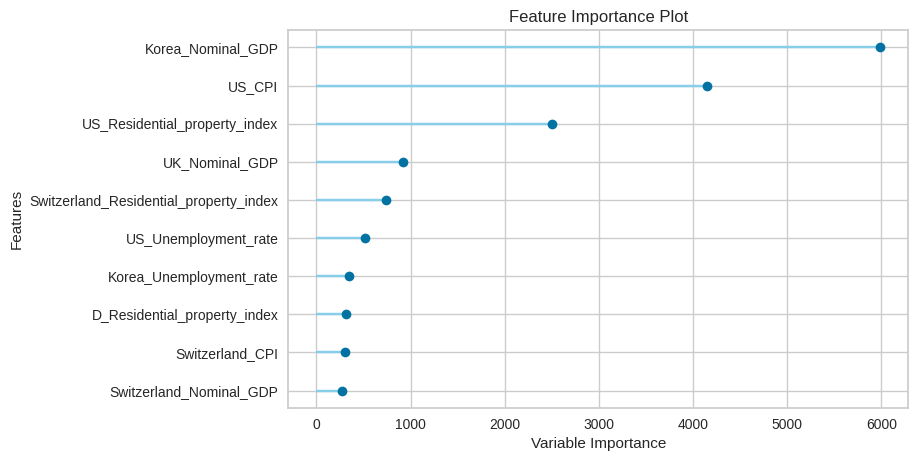

In [78]:
plot_model(tuned_lasso, plot='feature')

In [80]:
predict_model(tuned_lasso);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,488.069794,368551.1875,607.084229,0.9087,0.0289,0.0238


**Finalize the model, i.e. include all the training data into the training not only 80%**

In [81]:
final_lasso = finalize_model(tuned_lasso)

In [82]:
print(final_lasso)

Lasso(alpha=0.39, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=13,
      selection='cyclic', tol=0.0001, warm_start=False)


In [83]:
predict_model(final_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,122.106598,22775.529297,150.915604,0.9944,0.0076,0.0062


,Korea_Nominal_GDP,Korea_Unemployment_rate,Korea_Residential_property_index,US_CPI,US_Unemployment_rate,US_Residential_property_index,Canada_Unemployment_rate,Canada_Residential_property_index,Switzerland_Nominal_GDP,Switzerland_CPI,...,Date_weekday_1,Date_weekday_2,Date_weekday_3,Date_weekday_4,Date_weekday_5,Date_weekday_6,Date_is_month_end_0,Date_is_month_start_1,US_Nominal_GDP,Label
0,1.004961,0.198925,0.437297,1.005861,0.610044,0.788063,0.194602,1.000403,0.998151,0.969613,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,16319.540039,16164.460938
1,1.016871,0.193548,0.429925,1.014533,0.576071,0.795668,0.208807,0.992018,1.003687,0.970166,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16420.386719,16353.047852
2,1.028904,0.193548,0.419278,1.019810,0.565731,0.800623,0.176136,1.004539,1.005560,0.965746,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16629.050781,16565.816406
3,1.042017,0.177419,0.420219,1.018367,0.536189,0.815771,0.170455,1.027253,1.025328,0.972744,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16699.550781,16668.642578
4,1.054706,0.193548,0.414756,1.025488,0.491876,0.830294,0.166193,1.033997,1.031338,0.969061,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16911.068359,16877.746094
5,1.065523,0.193548,0.419403,1.030383,0.447563,0.838429,0.170455,1.035756,1.036691,0.969613,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,17133.113281,17112.560547
6,1.081264,0.236559,0.415637,1.038657,0.409158,0.847062,0.161932,1.056398,1.041404,0.965193,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,17144.281250,17245.261719
7,1.085792,0.252688,0.417592,1.045757,0.339734,0.867041,0.166193,1.085030,1.050503,0.974770,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,17462.703125,17505.474609
8,1.090551,0.252688,0.419438,1.049196,0.320532,0.882344,0.151989,1.094054,1.056375,0.969061,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,17743.226562,17613.304688
9,1.108093,0.268817,0.431719,1.045848,0.265879,0.891008,0.109375,1.095813,1.060638,0.967035,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,17852.539062,17730.042969


# Prediction on Unseen Dataset

In [84]:
unseen_predictions = predict_model(final_lasso, data=mev)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,25.4847,935.1047,30.5795,0.9501,0.0168,0.014


,Date,Korea_Nominal_GDP,Korea_CPI,Korea_Unemployment_rate,Korea_Residential_property_index,US_Nominal_GDP,US_CPI,US_Unemployment_rate,US_Residential_property_index,Canada_Nominal_GDP,...,Switzerland_Residential_property_index,UK_Nominal_GDP,UK_CPI,UK_Unemployment_rate,UK_Residential_property_index,D_Nominal_GDP,D_CPI,D_Unemployment_rate,D_Residential_property_index,Label
0,1975-01-01,2370600,9.012579,NaN,63.2476,1616.116,52.566667,8.27,60.02,167572,...,36.2205,26777,14.043801,3.969991,5.4978,NaN,39.142725,3.6,128.1556,1639.706299
1,1975-04-01,2583900,9.738219,NaN,65.3178,1651.853,53.200000,8.87,60.96,173748,...,35.7642,28090,15.371077,4.339689,5.6187,NaN,39.903834,4.2,127.2398,1676.813721
2,1975-07-01,2690300,10.384638,NaN,67.5589,1709.820,54.266667,8.47,61.16,182328,...,35.4102,29219,16.046223,4.699658,5.7999,NaN,40.208277,4.3,126.3735,1724.545654
3,1975-10-01,2898800,10.810701,NaN,69.3324,1761.831,55.266667,8.30,62.22,188532,...,35.2497,30850,16.598615,5.071648,5.8603,NaN,40.512721,4.2,125.2582,1710.535889
4,1976-01-01,3275500,11.030391,NaN,69.9437,1820.487,55.900000,7.73,62.86,196288,...,34.4582,32405,17.197039,5.298913,5.9812,NaN,41.186845,4.1,123.4281,1790.036255
